In [1494]:
# Tools and technologies used
### Python: Programming language
### Pandas: For data cleaning
### matplotlib: For data visualisation
### sklearn: For model building

# House Pricing Data
* ID: Unique identifier for each property.
* Zipcode: The postal code of the property's location.
* Latitude: Geographic latitude of the property.
* Longitude: Geographic longitude of the property.
    
## Categorical data 
* No of Bedrooms
* No of Floors: Number of floors in the house.
* Waterfront View: Indicates if the house has a waterfront view (Yes/No).
* No of Times Visited: Number of times the house was visited by prospective buyers.
* Condition of the House: The overall condition rating of the house.
* Overall Grade: The grade given to the house based on various factors.
* Renovated Year: Year the house was renovated; 0 indicates no renovation.

## Numerical data
* Date House was Sold
* Sale Price
* No of Bathrooms
* Flat Area (in Sqft): The interior area of the house in square feet.
* Lot Area (in Sqft): The total area of the property in square feet.
* Living Area after Renovation (in Sqft): The total living area after any renovation work.
* Lot Area after Renovation (in Sqft): The lot area after renovations.
* Area of the House from Basement (in Sqft): Total area of the house including basement space.
* Basement Area (in Sqft): 0 means no renovation.
* Age of House (in Years): The age of the house at the time of sale.

## Note:
##### The float values in the "No of Bathrooms" column represent fractional or partial bathrooms. Here's what they mean:

##### Full Bathroom (1.0):
* A full bathroom includes a sink, toilet, and either a shower, bathtub, or both.
    
##### Partial Bathroom (0.25, 0.5, or 0.75):
* 0.25: Indicates only one feature, such as a sink or toilet.
* 0.5: Typically includes a sink and toilet but no shower or bathtub (a "half bath").
* 0.75: Includes a sink, toilet, and shower, but no bathtub.
    
##### The total value combines the count of full and partial bathrooms. For example:
* 2.25 bathrooms means there are 2 full bathrooms and 1 partial bathroom (0.25).
### For analysis purposes, I am rounding off the 'No of Bathrooms' column to the nearest integer and treating it as categorical data.

# Import the libraries

In [1497]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Load Data

In [1499]:
data= pd.read_csv('C:\\Users\\Jyothy\\Downloads\\House_Pricing.csv')

# Display top 5 rows of dataset

In [1501]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Dropping 'ID', 'Zipcode', Latitude and Longitude columns

In [1505]:
data = data.drop(['ID', 'Zipcode', 'Latitude', 'Longitude'], axis=1)

# Display last 2 rows of dataset

In [1507]:
data.tail(2)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21611,15-Jan-16,400000.0,3,2.0,1600.0,2388.0,2.0,No,NaN,Fair,8,1600.0,0,14,0,1410.0,1287
21612,14-Oct-17,325000.0,2,1.0,1020.0,1076.0,2.0,No,NaN,Fair,7,1020.0,0,10,0,1020.0,1357


# Find total number of rows and columns

In [1509]:
data.shape

(21613, 17)

In [1510]:
rows=data.shape[0]
columns=data.shape[1]
print("Number of rows:",rows)
print("Number of columns:",columns)

Number of rows: 21613
Number of columns: 17


# Find data type of each column and memory usage

In [1512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Date House was Sold                        21613 non-null  object  
 1   Sale Price                                 21609 non-null  float64 
 2   No of Bedrooms                             21613 non-null  int64   
 3   No of Bathrooms                            21609 non-null  category
 4   Flat Area (in Sqft)                        21604 non-null  float64 
 5   Lot Area (in Sqft)                         21604 non-null  float64 
 6   No of Floors                               21613 non-null  category
 7   Waterfront View                            21613 non-null  object  
 8   No of Times Visited                        2124 non-null   object  
 9   Condition of the House                     21613 non-null  object  
 10  Overall Gr

### We can see that there are missing values in following columns; 'No of Times Visited', 'Area of the House from Basement (in Sqft)','Latitude ','Longitude' and 'Living Area after Renovation (in Sqft)'.

# Statistical summary of given data

In [1515]:
data.describe()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Lot Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,21613.000000,21604.000000,2.160400e+04,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21613.000000
mean,5.401984e+05,3.370842,2079.931772,1.510776e+04,7.623467,1788.344193,291.509045,46.994864,84.402258,1986.538914,12768.455652
std,3.673890e+05,0.930062,918.487597,4.142827e+04,1.105439,827.982604,442.575043,29.373411,401.679240,685.404255,27304.179631
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,3.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1429.250000,5.040000e+03,7.000000,1190.000000,0.000000,21.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,1910.000000,7.617500e+03,7.000000,1560.000000,0.000000,43.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2550.000000,1.068825e+04,8.000000,2210.000000,560.000000,67.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,10.000000,9410.000000,4820.000000,118.000000,2015.000000,6210.000000,871200.000000


* ### A 50th percentile (median) of 0 and a mean of 291.509045 for Basement Area strongly suggests a highly skewed distribution. This discrepancy indicates that a significant portion of the houses in the dataset likely have no basement (hence the median of 0), while a smaller number of houses have very large basements, pulling the mean upwards.

* ### A 50th percentile (median) of 0 and a mean of 84 for renovated year suggests a right-skewed distribution with numerous houses not being renovated (represented by the zero median), and a smaller number of houses being renovated.

# Check number of nulll values in each column

In [1519]:
data.isna().sum()

Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Living Area after Renovation (in Sqft)           1
Lot Area after Renovation (in Sqft)              0
dtype: int64

### In 'No of Times Visited' column, out of 21613 rows 19489 are null values. We have only 2124 rows of available data.

# Percentage of null values in each column

In [1522]:
data.isna().sum()/data.shape[0]*100

Date House was Sold                           0.000000
Sale Price                                    0.018507
No of Bedrooms                                0.000000
No of Bathrooms                               0.018507
Flat Area (in Sqft)                           0.041642
Lot Area (in Sqft)                            0.041642
No of Floors                                  0.000000
Waterfront View                               0.000000
No of Times Visited                          90.172581
Condition of the House                        0.000000
Overall Grade                                 0.000000
Area of the House from Basement (in Sqft)     0.013881
Basement Area (in Sqft)                       0.000000
Age of House (in Years)                       0.000000
Renovated Year                                0.000000
Living Area after Renovation (in Sqft)        0.004627
Lot Area after Renovation (in Sqft)           0.000000
dtype: float64

### Since the percentage of null values are above 90, I am dropping the column 'No of Times visited'.

In [1524]:
data = data.drop(['No of Times Visited'], axis=1) # Drop the column 'No of Times Visited'

In [1525]:
data.head(2)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14-Oct-17,221900.0,3,1.0,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,1340.0,5650
1,14-Dec-17,538000.0,3,2.0,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,1690.0,7639


# Check for missing values visually

In [1527]:
# import seaborn as sns
# plt.figure(figsize=(12, 6))
# plt.title('Missing Values Heatmap')
# sns.heatmap(data.isna(),annot=True,cmap='viridis')
# plt.show()

# Checking the data distribution of numerical columns that have missing values
#### A histogram provides visual insights into the distribution of data. Skewness in the distribution can indicate the presence of outliers, which are data points that are significantly different from the majority of the data.

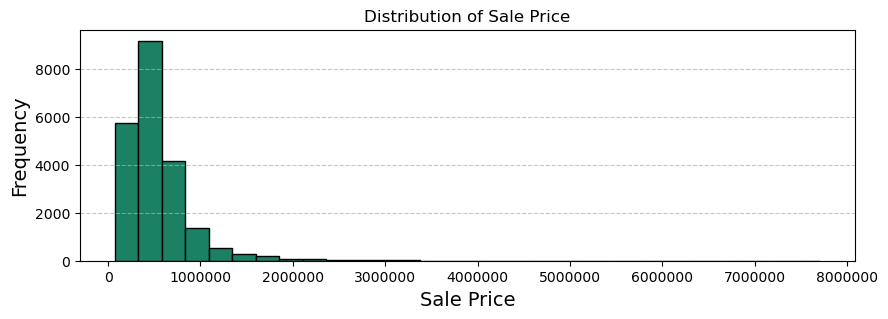

In [1529]:
plt.figure(figsize=(10, 3))
plt.hist(data['Sale Price'], bins=30, color='#1c8065', edgecolor='black')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') # To avoid rounded indices in x axis
plt.title("Distribution of Sale Price")
plt.show()

### Data is positively skewed.

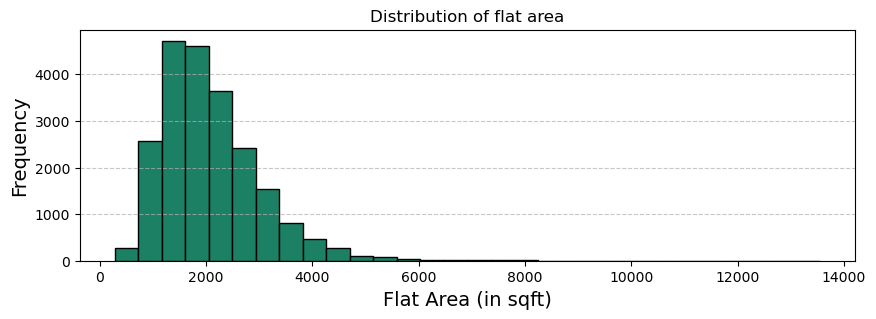

In [1531]:
plt.figure(figsize=(10, 3))
plt.hist(data['Flat Area (in Sqft)'], bins=30, color='#1c8065', edgecolor='black')
plt.xlabel('Flat Area (in sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') # To avoid rounded indices in x axis
plt.title("Distribution of flat area")
plt.show()

### Data is positively skewed.

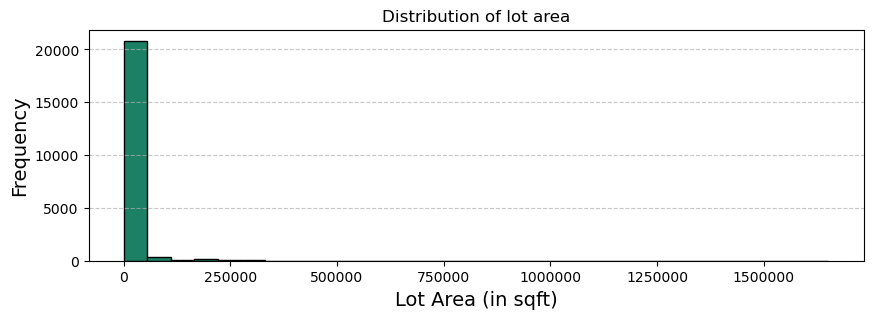

In [1533]:
plt.figure(figsize=(10, 3))
plt.hist(data['Lot Area (in Sqft)'], bins=30, color='#1c8065', edgecolor='black')
plt.xlabel('Lot Area (in sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') # To avoid rounded indices in x axis
plt.title("Distribution of lot area")
plt.show()

### Data is positively skewed

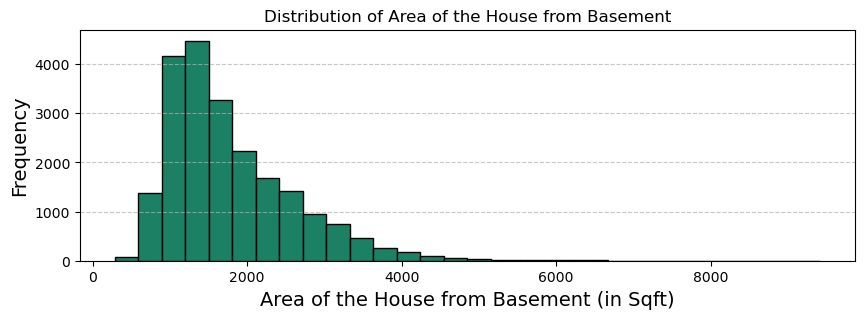

In [1535]:
plt.figure(figsize=(10, 3))
plt.hist(data['Area of the House from Basement (in Sqft)'], bins=30, color='#1c8065', edgecolor='black')
plt.xlabel('Area of the House from Basement (in Sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') # To avoid rounded indices in x axis
plt.title("Distribution of Area of the House from Basement")
plt.show()

### Data is positively skewed

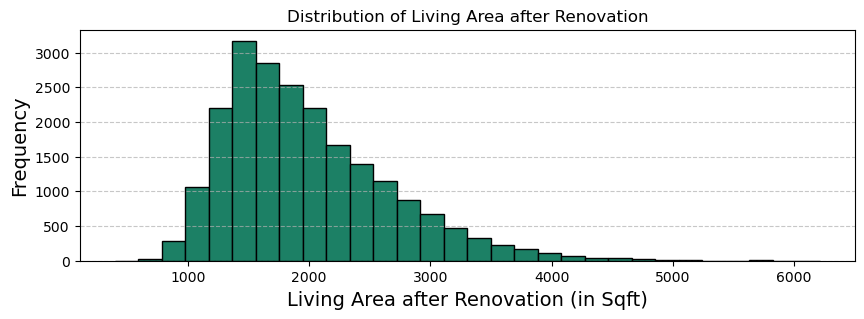

In [1537]:
plt.figure(figsize=(10, 3))
plt.hist(data['Living Area after Renovation (in Sqft)'], bins=30, color='#1c8065', edgecolor='black')
plt.xlabel('Living Area after Renovation (in Sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') # To avoid rounded indices in x axis
plt.title("Distribution of Living Area after Renovation")
plt.show()

### Data is positively skewed

# Handling missing values

### Since the data shows positive skew, I am using mode to replace the missing values.

* ### Finding mode values of numerical data

In [1542]:
# Use index [0] to choose the first mode in case of multi mode series
mode_salePrice= data['Sale Price'].mode()[0]
mode_flatArea= data['Flat Area (in Sqft)'].mode()[0]
mode_lotArea= data['Lot Area (in Sqft)'].mode()[0]
mode_area_from_Basement= data['Area of the House from Basement (in Sqft)'].mode()[0]
mode_living_area_after_Renovation= data['Living Area after Renovation (in Sqft)'].mode()[0]

* ### Finding mode of categorical data

In [1544]:
mode_no_of_Bathrooms= data['No of Bathrooms'].mode()
mode_no_of_Bathrooms[0] # Select the first mode from the resulting series to avoid occurance of multiple modes.

2.0

# Imputation

* ### Numerical data: Replacing missing values with mode

In [1547]:
data.update({'Sale Price': data['Sale Price'].fillna(mode_salePrice),
             'Flat Area (in Sqft)': data['Flat Area (in Sqft)'].fillna(mode_flatArea),
            'Lot Area (in Sqft)': data['Lot Area (in Sqft)'].fillna(mode_lotArea),
             'Area of the House from Basement (in Sqft)': data['Area of the House from Basement (in Sqft)'].fillna(mode_area_from_Basement),
            'Living Area after Renovation (in Sqft)': data['Living Area after Renovation (in Sqft)'].fillna(mode_living_area_after_Renovation)
             })

* ### Categorical data: Replacing missing values with mode

In [1549]:
data.update({'No of Bathrooms': data['No of Bathrooms'].fillna(mode_no_of_Bathrooms[0])})

## Replacing missing values in Latitude and Longitude using mean or mode doesn't make any sense. So I am leaving it as it is.

# Check for missing values again

In [1552]:
data.isna().sum()

Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Check for duplicates

* ### Check for duplicated rows

In [1555]:
data.duplicated().sum() # Finding number of duplicated rows

2

* ### Drop duplicate rows

In [1557]:
# Removes all duplicate rows except the first occurrence
duplicates = data.duplicated()
data = data[~duplicates]  # Keep rows where duplicates is False (not a duplicate)
data.shape #Shows updated number of rows and columns after removing duplicates

(21611, 16)

* ### Check for duplicate columns visually

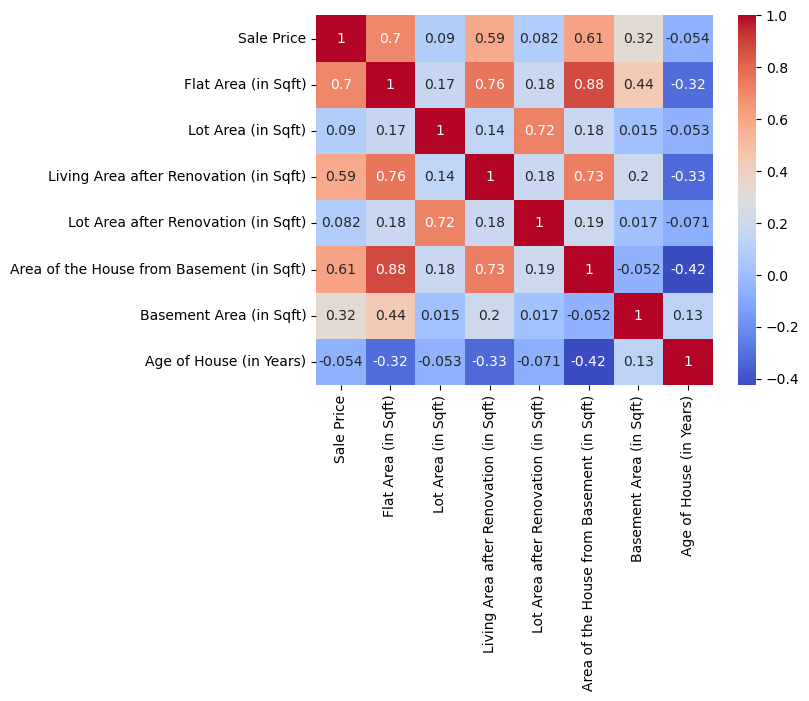

In [1559]:
import seaborn as sns
num_data=data[['Sale Price','Flat Area (in Sqft)',
'Lot Area (in Sqft)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)',
'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)']]
sns.heatmap(num_data.corr(), annot=True,cmap='coolwarm') # Correlation value of 1 in any non diagonal tile means it is a duplicate column
plt.show()

### There are no duplicate numerical columns in the dataset

#### High positive correlation (above 0.7): 
* 'Flat Area (in Sqft)' with 'Area of the House from Basement (in Sqft)': 0.88
* 'Flat Area (in Sqft)' with 'Living Area after Renovation (in Sqft)': 0.76
* 'Lot Area (in Sqft)' with 'Lot Area after Renovation (in Sqft)': 0.72
* 'Living Area after Renovation (in Sqft)' with 'Area of the House from Basement (in Sqft)': 0.73
  
#### Moderate positive correlation (between 0.3 and 0.7; here I am considering only those values that are close to 0.7):
* 'Sale Price' with 'Flat Area(in sqft)': 0.7
* 'Sale Price' with 'Area of the House from Basement (in Sqft)': 0.61

# Create a binary categorical column for Renovated/Not Renovated

In [1563]:
data['Renovated Status'] = data['Renovated Year'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')
data.head(2)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovated Status
0,14-Oct-17,221900.0,3,1.0,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,1340.0,5650,Not Renovated
1,14-Dec-17,538000.0,3,2.0,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,1690.0,7639,Renovated


In [1564]:
# Display the count of each category
print(data['Renovated Status'].value_counts())

Renovated Status
Not Renovated    20697
Renovated          914
Name: count, dtype: int64


In [1565]:
updated_rows=data.shape[0]
updated_columns=data.shape[1]
print("Updated number of rows:",updated_rows)
print("Updated number of columns:",updated_columns)

Updated number of rows: 21611
Updated number of columns: 17


# Scaling

### Min-Max scaling can be sensitive to outliers. So I am using standard scaling.

In [1628]:
from sklearn.preprocessing import StandardScaler

numerical_cols=['Flat Area (in Sqft)',
'Lot Area (in Sqft)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)',
'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)']

# Standard Scaling
std_scaler = StandardScaler()
data_standard_scaled[numerical_cols] = standard_scaler.fit_transform(data[numerical_cols])
display(data_standard_scaled)


,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovated Status
0,14-Oct-17,221900.0,3,1.0,-0.979602,-0.228263,1.0,No,Fair,7,-0.734778,-0.658682,0.544794,0,-0.943400,-0.260745,Not Renovated
1,14-Dec-17,538000.0,3,2.0,0.533869,-0.189829,2.0,No,Fair,7,0.460978,0.245108,0.680980,1991,-0.432731,-0.187900,Renovated
2,15-Feb-16,180000.0,2,1.0,-1.426022,-0.123244,1.0,No,Fair,6,-1.229990,-0.658682,1.293818,0,1.070096,-0.172408,Not Renovated
3,14-Dec-17,604000.0,4,3.0,-0.130316,-0.243956,1.0,No,Excellent,7,-0.891796,1.397441,0.204328,0,-0.914219,-0.284550,Not Renovated
4,15-Feb-16,510000.0,3,2.0,-0.435188,-0.169597,1.0,No,Fair,8,-0.130861,-0.658682,-0.544696,0,-0.272235,-0.192881,Not Renovated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,14-May-17,360000.0,3,2.0,-0.598512,-0.337363,3.0,No,Fair,8,-0.312036,-0.658682,-1.293720,0,-0.666179,-0.412404,Not Renovated
21609,15-Feb-16,400000.0,4,2.0,0.250774,-0.224328,2.0,No,Fair,8,0.630075,-0.658682,-1.463953,0,-0.228463,-0.203978,Not Renovated
21610,14-Jun-17,402101.0,2,0.0,-1.153815,-0.332076,2.0,No,Fair,7,-0.928031,-0.658682,-1.293720,0,-1.410298,-0.394166,Not Renovated
21611,15-Jan-16,400000.0,3,2.0,-0.522294,-0.307016,2.0,No,Fair,8,-0.227487,-0.658682,-1.123487,0,-0.841266,-0.420535,Not Renovated


# Rounding off the columns 'No of Bathrooms' and 'No of floors' to the nearest integer

In [1630]:
data_standard_scaled['No of Bathrooms'] = data_standard_scaled['No of Bathrooms'].round()
# Convert the rounded values to categorical data
data_standard_scaled['No of Bathrooms'] = data_standard_scaled['No of Bathrooms'].astype('category')


data_standard_scaled['No of Floors'] = data_standard_scaled['No of Floors'].round()
# Convert the rounded values to categorical data
data_standard_scaled['No of Floors'] = data_standard_scaled['No of Floors'].astype('category')

# Encoding

### Nominal Data
* Waterfront View (Yes/No)
* Renovated status (Renovated/Not Renovated)

In [1571]:
#### Checking unique values
print(data_standard_scaled['Waterfront View'].unique())
print(data_standard_scaled['Renovated Status'].unique())

['No' 'Yes']
['Not Renovated' 'Renovated']


### Ordinal Data
* No of Bedrooms
* No of Floors
* Condition of the House (Poor, Fair, Good, Excellent)
* Overall Grade (a rating with an order)

In [1573]:
print(data_standard_scaled['No of Bedrooms'].unique())
print(data_standard_scaled['No of Floors'].unique())
print(data_standard_scaled['Condition of the House'].unique())
print(data_standard_scaled['Overall Grade'].unique())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
[1.  2.  1.5 3.  2.5 3.5]
['Fair' 'Excellent' 'Good' 'Bad' 'Okay']
[ 7  6  8 10  9  5  4  3  2  1]


# Outlier Handling

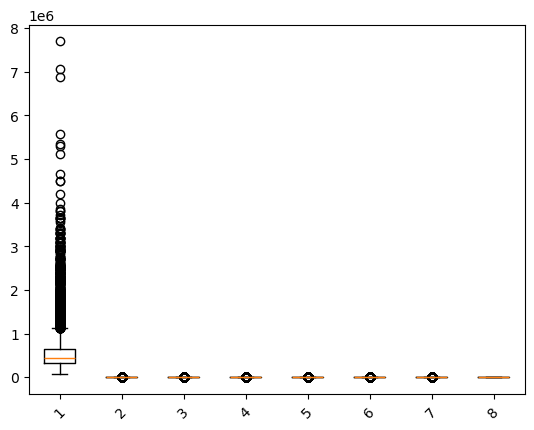

In [1616]:
# Ensure you are providing only numerical data in box float
num_data=data_standard_scaled[['Sale Price','Flat Area (in Sqft)',
'Lot Area (in Sqft)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)',
'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)']]
plt.boxplot(num_data)
plt.xticks(rotation = 45)
plt.show()